# 자연어 처리

## 1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy 패키지 설치
    - 1. JDK설치 : Java JDK로 검색해서 OS에 맞춰 설치
    - 2. KoNLPy 의존성 패키지 설치하기
        - **pip install jpype1**
    - 3. KoNLPy 설치
        - **pip install konlpy**
    - 4.  (C:\Users\A\Anaconda3) C:\Users\A\Anaconda3>python
        - import nltk
        - nltk.download()
        - stopwords & punkt duble click download
    - 5. 워드 클라우드
        - pip install wordcloud
    - 6. gensim 설치
        - pip install gensim

## 2. 한글 자연어 처리 기초

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from konlpy.tag import Kkma # 꼬꼬마 사전
kkma = Kkma()

In [3]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [4]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [5]:
#POS(Part Of Speech)형태소 품사
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [6]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [7]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [8]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~') #말뭉치

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [9]:
#pos : 형태소
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [10]:
#트위터 분석
from konlpy.tag import Okt
t = Okt()

In [11]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [12]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [13]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 3. 워드 클라우드
* WordCloud 설치: pip install wordcloud
* PIL(Python Imaging Library)

In [14]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [15]:
text = open('../data/09. alice.txt').read()
alice_mask = np.array(Image.open('../data/09. alice_mask.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")

In [16]:
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False # - 기호 깨지는것 방지
#f_path = "/Library/Fonts/AppleGothic.ttf" (맥)
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

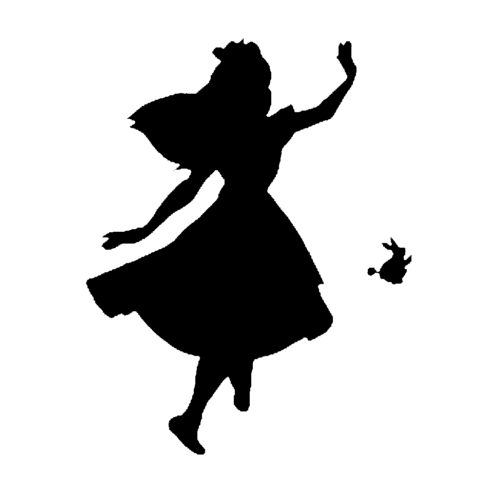

In [17]:
plt.figure(figsize=(6,6))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
wc = WordCloud(background_color='white', max_words=2000, #최대200단어
                mask=alice_mask, stopwords = stopwords)
wc = wc.generate(text) #엘리스라는 문서에서 단어를 뽑아옴
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

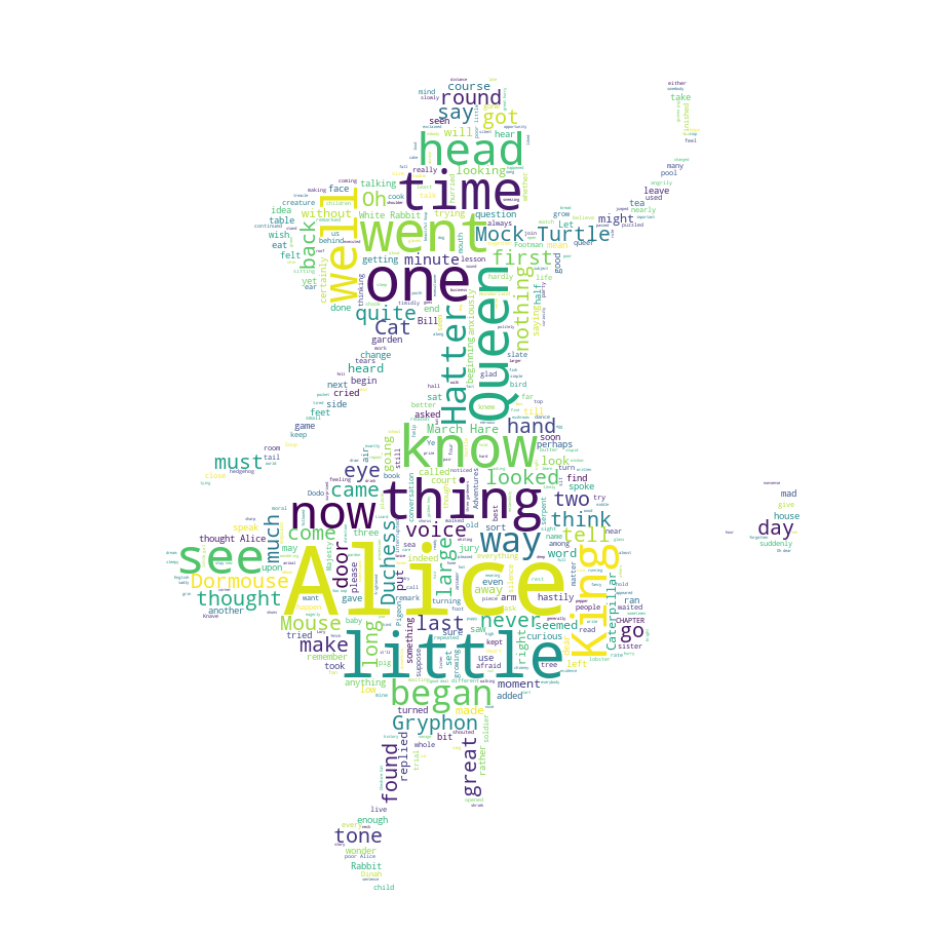

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear') # 그림이 겹쳐 보이지 않게
plt.axis('off')
plt.show()

In [20]:
text = open('../data/09. a_new_hope.txt').read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')
mask = np.array(Image.open('../data/09. stormtrooper_mask.png'))

In [21]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [22]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
                margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [23]:
import random
def grey_color_func(word, font_size, position, orientation,
                     random_state=None, **kwargs):
  return 'hsl(0, 0%%, %d%%)' % random.randint(60,100) #hsl:색상,채도,명도

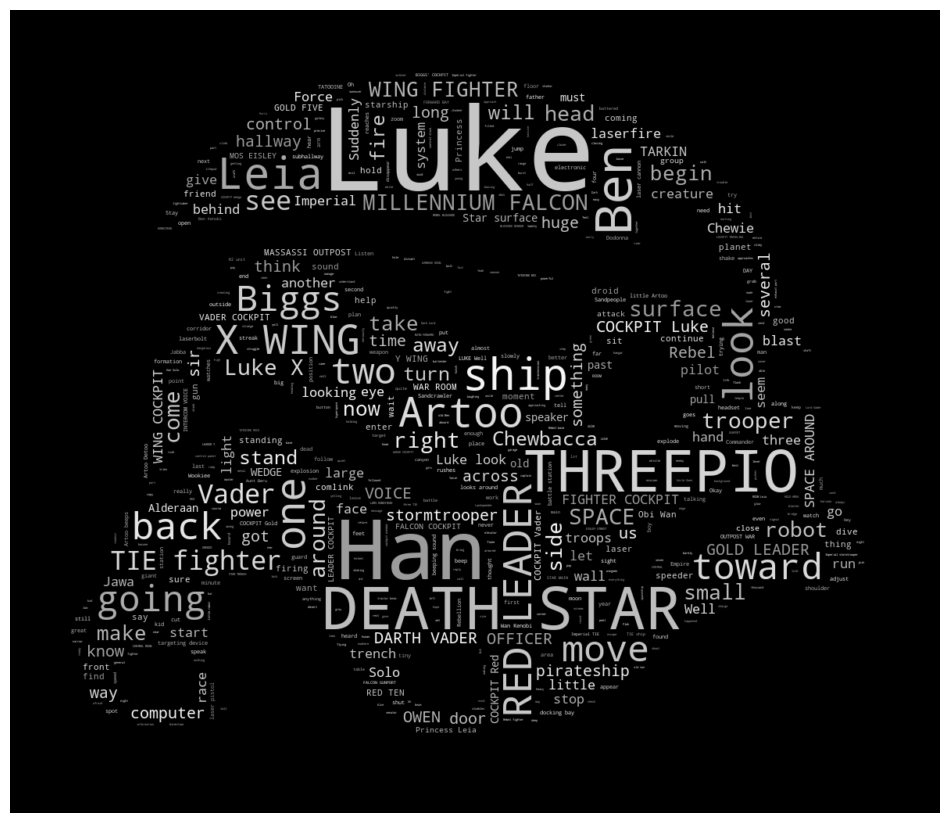

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
            interpolation='bilinear')
plt.axis('off')
plt.show()

## 육아휴직관련 법안 1809890호

In [25]:
import nltk

In [26]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
print(files_ko)
doc_ko = kobill.open('1809890.txt').read()

['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']


In [27]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [28]:
from konlpy.tag import Twitter
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [29]:
ko = nltk.Text(tokens_ko)

In [30]:
print(len(ko.tokens))     # 수집된 단어의 횟수
print(len(set(ko.tokens))) # 고유한 횟수
ko.vocab()                 # 단어의 빈도 수

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

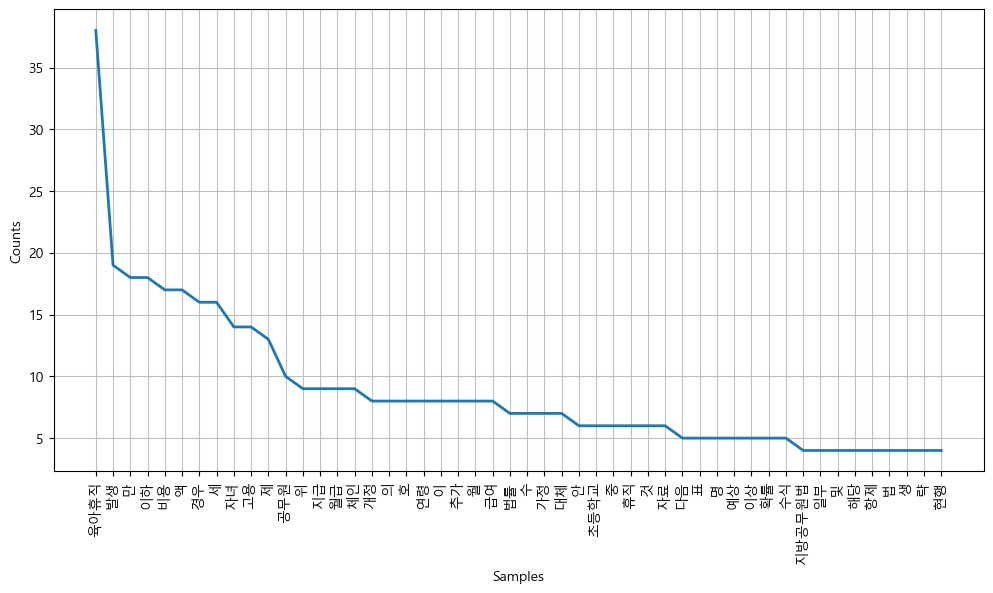

In [31]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [32]:
#불용어 처리
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×',
              '의','자','에','안','번','호','을','이','다','만',
              '로','가','를','발','인','액','수','세','중','제','월','곳',
             '위','이하','것','표','명', '및']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '제안',
 '이유',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '자녀',
 '나이',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '개정',
 '것임',
 '항제',
 '법률',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '항제',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '현',
 '행',
 '개',
 '정',
 '휴직',
 '생',
 '략',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '다만',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '생',
 '략',
 '현행',
 '초등학교',
 '취',
 '취학',
 '중인',
 '경우',
 '학',
 '전',
 '자녀',
 '양육',
 '초등학교',
 '학년',
 '여',
 '여자',
 '공무원',
 '말',
 '자녀',
 '임신',
 '출산',
 '때',
 '생',
 '략',
 '생',
 '략',
 '현행',


In [33]:
stop_words

['.',
 '(',
 ')',
 ',',
 "'",
 '%',
 '-',
 'X',
 ').',
 '×',
 '의',
 '자',
 '에',
 '안',
 '번',
 '호',
 '을',
 '이',
 '다',
 '만',
 '로',
 '가',
 '를',
 '발',
 '인',
 '액',
 '수',
 '세',
 '중',
 '제',
 '월',
 '곳',
 '위',
 '이하',
 '것',
 '표',
 '명',
 '및']

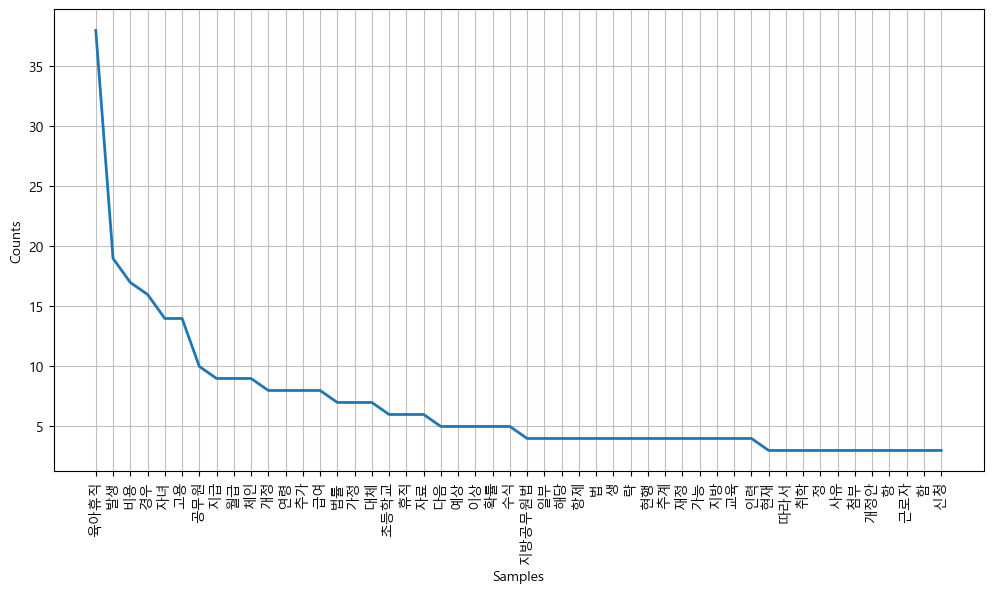

In [34]:
ko = nltk.Text(ko)
plt.figure(figsize=(12,6))
ko.plot(50)    #Plot sorted frequency of top 50 tokens
plt.show()

In [35]:
ko.count('초등학교')

6

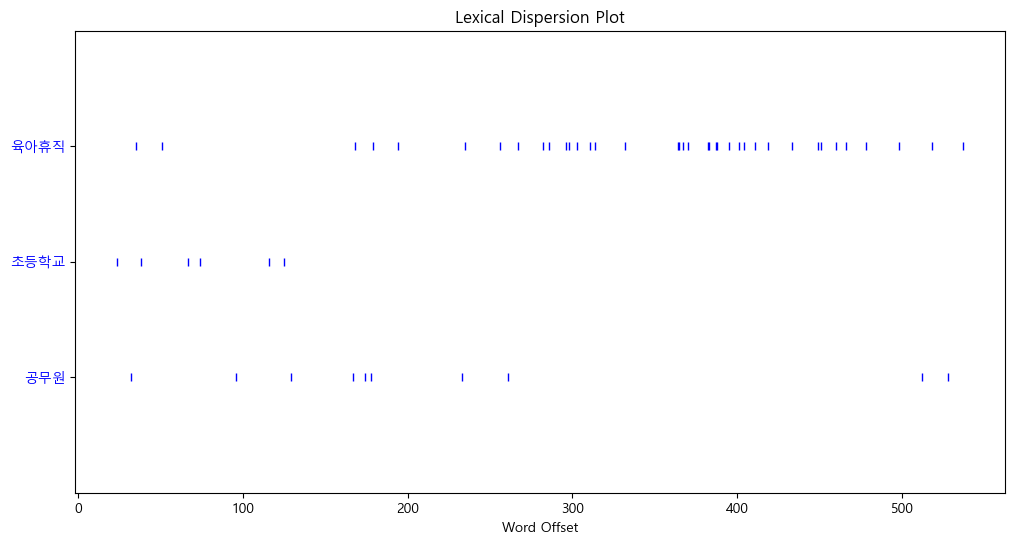

In [36]:
#단어의 문장내 위치
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [37]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 여상규 안규백 황영철 박영아 김정훈 김학송 의원 제안 이유 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 자녀 나이 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 것임 따
률 지방공무원법 일부 개정 법률 지방공무원법 일부 다음 개정 항제 초등학교 취학 전 자녀 취학 중인 경우 초등학교 학년 말 자녀 부 칙 법 
원법 일부 다음 개정 항제 초등학교 취학 전 자녀 취학 중인 경우 초등학교 학년 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 현 행 개
 사유 직 임용 휴직 다만 경우 대통령령 정 사정 직 생 략 현행 초등학교 취 취학 중인 경우 학 전 자녀 양육 초등학교 학년 여 여자 공무
정 직 생 략 현행 초등학교 취 취학 중인 경우 학 전 자녀 양육 초등학교 학년 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 현행 


In [38]:
# ko.collocations()  문장 내에서 연이어 나타난다
ko.collocation_list()

[('초등학교', '저학년'),
 ('공무원', '근로자'),
 ('근로자', '육아휴직'),
 ('대상자', '육아휴직'),
 ('육아휴직', '대상자'),
 ('공무원', '육아휴직'),
 ('육아휴직', '육아휴직')]

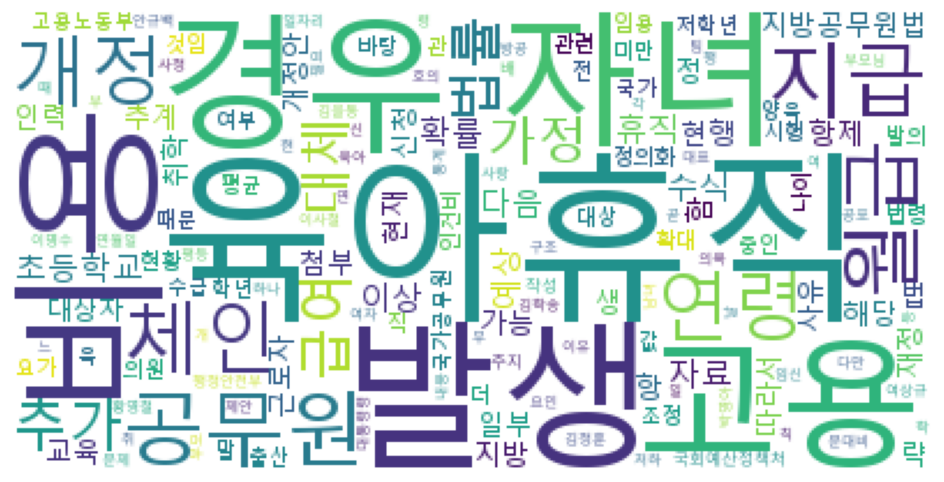

In [39]:
data = ko.vocab().most_common(150)
wordcloud = WordCloud(font_path='c:Windows/Fonts/malgun.ttf',
                     relative_scaling=0.1,
                     background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

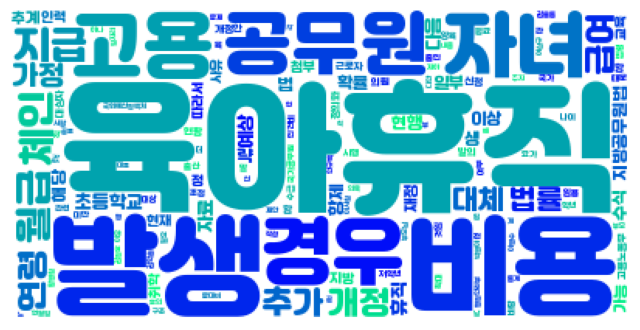

In [42]:
data = ko.vocab().most_common(150)
wordcloud = WordCloud(font_path='C:/Users/Playdata/Jalnan.ttf',
                     relative_scaling=0.1,
                     background_color='white',
                     colormap = 'winter'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

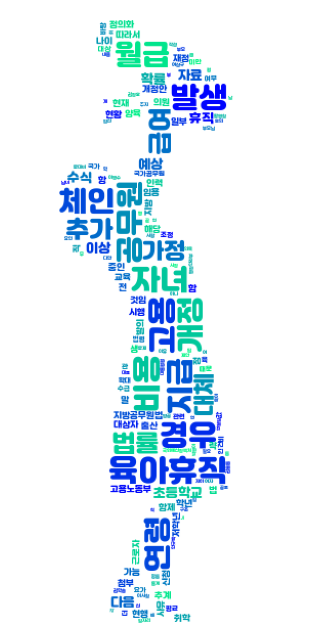

In [46]:
mask1 = np.array(Image.open('../img/333.png'))

data = ko.vocab().most_common(150)
wordcloud = WordCloud(font_path='C:/Users/Playdata/Jalnan.ttf',
                     relative_scaling=0.1,
                     background_color='white',
                     colormap = 'winter',
                     mask = mask1
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 5. Naive Bayes Classifier의 이해 - 영문

In [47]:
from nltk.tokenize import word_tokenize
import nltk

In [48]:
# 지도 학습, 비지도 학습 - 지도학습 예로 생각
# 훈련세트 4개 문장에 라벨링 - 긍정, 부정
train = [('i like you', 'pos'),
         ('i hate you', 'neg'),
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [52]:
a = (train[0])
a

('i like you', 'pos')

In [51]:
print(word_tokenize(train[0][0]))

['i', 'like', 'you']


In [50]:
for i in train:
    for j in word_tokenize(i[0]):
        print(j.lower())

i
like
you
i
hate
you
you
like
me
i
like
her


In [54]:
#말뭉치
all_words = set(word.lower() for sentence in train
                for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [56]:
t=[({word:(word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'like': True,
   'you': True,
   'i': True,
   'me': False,
   'hate': False,
   'her': False},
  'pos'),
 ({'like': False,
   'you': True,
   'i': True,
   'me': False,
   'hate': True,
   'her': False},
  'neg'),
 ({'like': True,
   'you': True,
   'i': False,
   'me': True,
   'hate': False,
   'her': False},
  'neg'),
 ({'like': True,
   'you': False,
   'i': True,
   'me': False,
   'hate': False,
   'her': True},
  'pos')]

In [57]:
#hate가 fase일 때 pos:neg 1.7:1.0
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


In [58]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower():
                      (word in word_tokenize(test_sentence.lower()))
                                         for word in all_words}
test_sent_features

{'like': True,
 'you': False,
 'i': True,
 'me': False,
 'hate': False,
 'her': False}

In [59]:
classifier.classify(test_sent_features)

'pos'

# 6.Naive Bayes Classifier의 이해 -한글

In [60]:
from konlpy.tag import Twitter

In [61]:
pos_tagger = Twitter()

In [62]:
#지도 학습 - 훈련세트의 문장이 긍정(pos), 부정(neg) 라벨링 되어 있음
train = [('메리가 좋아', 'pos'),
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [63]:
#말 뭉치
all_words = set(word.lower() for sentence in train
                for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [64]:
t = [({word:(word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'난': False,
   '고양이야': False,
   '메리는': False,
   '마치고': False,
   '고양이도': False,
   '놀거야': False,
   '메리가': True,
   '메리랑': False,
   '지루해': False,
   '이쁜': False,
   '좋아': True,
   '수업이': False},
  'pos'),
 ({'난': False,
   '고양이야': False,
   '메리는': False,
   '마치고': False,
   '고양이도': True,
   '놀거야': False,
   '메리가': False,
   '메리랑': False,
   '지루해': False,
   '이쁜': False,
   '좋아': True,
   '수업이': False},
  'pos'),
 ({'난': True,
   '고양이야': False,
   '메리는': False,
   '마치고': False,
   '고양이도': False,
   '놀거야': False,
   '메리가': False,
   '메리랑': False,
   '지루해': True,
   '이쁜': False,
   '좋아': False,
   '수업이': True},
  'neg'),
 ({'난': False,
   '고양이야': True,
   '메리는': True,
   '마치고': False,
   '고양이도': False,
   '놀거야': False,
   '메리가': False,
   '메리랑': False,
   '지루해': False,
   '이쁜': True,
   '좋아': False,
   '수업이': False},
  'pos'),
 ({'난': True,
   '고양이야': False,
   '메리는': False,
   '마치고': True,
   '고양이도': False,
   '놀거야': True,
   '메리가': False,
   '메리랑': True,
   '지루해': False,
   '이쁜': 

In [65]:
test_sentence = '난 수업이 마치면 메리랑 놀꺼야'

In [66]:
test_sentence = '난 수업이 마치면 메리랑 놀꺼야'
test_sent_features = {word.lower():
                    (word in word_tokenize(test_sentence.lower()))
                                        for word in all_words}
test_sent_features


{'난': True,
 '고양이야': False,
 '메리는': False,
 '마치고': False,
 '고양이도': False,
 '놀거야': False,
 '메리가': False,
 '메리랑': True,
 '지루해': False,
 '이쁜': False,
 '좋아': False,
 '수업이': True}

In [70]:
classifier.classify(test_sent_features)

'pos'

In [67]:
from konlpy.tag import Twitter
twitter = Twitter()
print(twitter.pos('이것도 재미 있습니당ㅋㅋ'))
print('--------------------------------------------------------------------')
print(twitter.pos('이것도 재미 있습니당ㅋㅋ', norm=True))
print('--------------------------------------------------------------------')
print(twitter.pos('이것도 재미 있습니당ㅋㅋ', norm=True, stem=True))

[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있', 'Adjective'), ('습', 'Noun'), ('니당', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
--------------------------------------------------------------------
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있습니다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]
--------------------------------------------------------------------
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('재미', 'Noun'), ('있다', 'Adjective'), ('ㅋㅋ', 'KoreanParticle')]


In [68]:
#stem=True : 원형, norm=True : 정규화(normalize)
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [69]:
for row in train:
    print(tokenize(row[0]))

['메리/Noun', '가/Josa', '좋다/Adjective']
['고양이/Noun', '도/Josa', '좋다/Adjective']
['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective']
['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa']
['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb']


In [71]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [72]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [73]:
def term_exists(doc):
    return {word: (word in set (doc)) for word in tokens}

In [74]:
for d,c in train_docs:
    print(d, c)

['메리/Noun', '가/Josa', '좋다/Adjective'] pos
['고양이/Noun', '도/Josa', '좋다/Adjective'] pos
['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'] neg
['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'] pos
['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'] pos


In [75]:
#'메리가 좋아', '고양이도 좋아'
#토큰라이징한 후 문장이 말뭉치에 있는지 확인
train_xy =[(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [76]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [77]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [78]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [79]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

# 문제

In [81]:
text1 = open('../data/k_keyw.txt', 'rt', encoding='UTF8').read()
text1

'국문키워드\n내복;기능성 이너웨어;발열 섬유;정기공기층;모세관 효과\n용;흑룡;2012년\n우주식품;우주음식;동결건조\n아시모프;아이작 아시모프;SF;공상과학;로봇공학\n전동기;전동;윷놀이;실험;관성;원심력;구심력\n인공지능;로봇;키보;왓슨;CRAB\n전통놀이;연날리기;베르누이;양력;항력;윷놀이\n우주예보;우주날씨;슈퍼플레어;플레어;태양폭풍;코로나 질량 방출;CME\n바나나;파나마병;그로 미셸;캐번디시\n게임;게임엔진;물리엔진;렌더링엔진\n전화;전화기;발명;특허;벨;엘리샤 그레이;안토니오 무치;전자석\n해양쓰레기;쓰나미 쓰레기;쓰레기 섬;오스커스\n반려동물;애완동물;개;고양이;애완견\n남극;운석;시원운석;분화운석;콘드라이트;화구\n경마;경주로;모래주로;잔디주로;인공주로\n사카린;인공감미료;콘스탄틴 팔베르크\n타이타닉;선박;여객선;배;침몰;수밀격벽;수밀구획;격실\n실험;카드;마술;굴절;전반사;광섬유\n시험관 고기;줄기세포;포스트\n몬드리안;화가;그림;회화;추상화;미술;기하학\n과학은행;소재은행;세균은행;병원균바이러스은행;한국세포주은행;한국식물DNA은행\n파이데이;파이;원주율;π\n이산화탄소;인공뼈;탄산무수화효소;탄산화합물;에코프리미엄프로듀스;석면;크리소타일\n요리;음식;화학반응;삼투압;끓는점오름;젤화\n화성;화성탐사;큐리오시티;마스 오디세이\n분광기;CD;빛;회절;굴절;분산;스펙트럼\n식물;타감작용;타감물질;갈로탄닌\n테오얀센;키네틱 아트\n선거;총선;데이터;데이터시각화\n한의학;한방침;전기침;스마트침\n로봇;극한작업로봇;티호크;팩봇\n마다가스카;마다가스카르\n게임;경쟁;폴드잇;EteRNA\n바퀴;무게중심;중력;실험\n동물실험;동물대체시험\n돌고래;제돌이;자연방류;남방큰돌고래\n협력;동료애;흡혈박쥐;황제펭귄;공생\n세계박람회;엑스포;여수;에펠탑;증기기관차\n식품첨가물;식품안전;MSG;카제인나트륨;합성보존료\n발명;특허;이쑤시개\n생물다양성;식물;육종\n아리랑 3호;인공위성;로켓;H-ⅡA\n쿠스;해양예측시스템;KOOS;해양예보;해양과학기술\n자석;자기력;자화;네

In [82]:
from konlpy.tag import Twitter
t1 = Twitter()
tokens_ko1 = t1.nouns(text1)
tokens_ko1

['국문',
 '키',
 '워드',
 '내복',
 '기능',
 '웨어',
 '발열',
 '섬유',
 '정기',
 '공기',
 '층',
 '모세관',
 '효과',
 '용',
 '흑룡',
 '우주',
 '식품',
 '우주',
 '음식',
 '동결',
 '건조',
 '아시모프',
 '아이작',
 '아시모프',
 '공상',
 '과학',
 '로봇공학',
 '전동기',
 '전동',
 '윷놀이',
 '실험',
 '관성',
 '원심력',
 '구심력',
 '인공',
 '지능',
 '로봇',
 '키보',
 '왓슨',
 '전통',
 '연날리기',
 '베르누이',
 '양력',
 '항력',
 '윷놀이',
 '우주',
 '예보',
 '우주',
 '날씨',
 '슈퍼',
 '플레어',
 '플레어',
 '태양폭풍',
 '코로나',
 '질량',
 '방출',
 '바나나',
 '파나마병',
 '그로',
 '미셸',
 '캐번디시',
 '게임',
 '게임엔진',
 '물리엔진',
 '렌더링',
 '엔진',
 '전화',
 '전화기',
 '발명',
 '특허',
 '벨',
 '엘리샤',
 '그레이',
 '안토니오',
 '무치',
 '전자석',
 '해양',
 '쓰레기',
 '쓰나미',
 '쓰레기',
 '쓰레기',
 '섬',
 '오스',
 '커스',
 '반려동물',
 '애완동물',
 '개',
 '고양이',
 '애완견',
 '남극',
 '운석',
 '시원',
 '운석',
 '분화',
 '운석',
 '콘드라이트',
 '화구',
 '경마',
 '경주로',
 '모래',
 '주로',
 '잔디',
 '주로',
 '인공',
 '주로',
 '사카린',
 '인공',
 '감미료',
 '콘스탄틴',
 '베르크',
 '타이타닉',
 '선박',
 '여객선',
 '배',
 '침몰',
 '수밀격벽',
 '밀',
 '구획',
 '격실',
 '실험',
 '카드',
 '마술',
 '굴절',
 '전반사',
 '광섬유',
 '시험관',
 '고기',
 '줄기세포',
 '포스트',
 '몬드리안',
 '화가',
 '그림',
 '회화',
 '추상화',

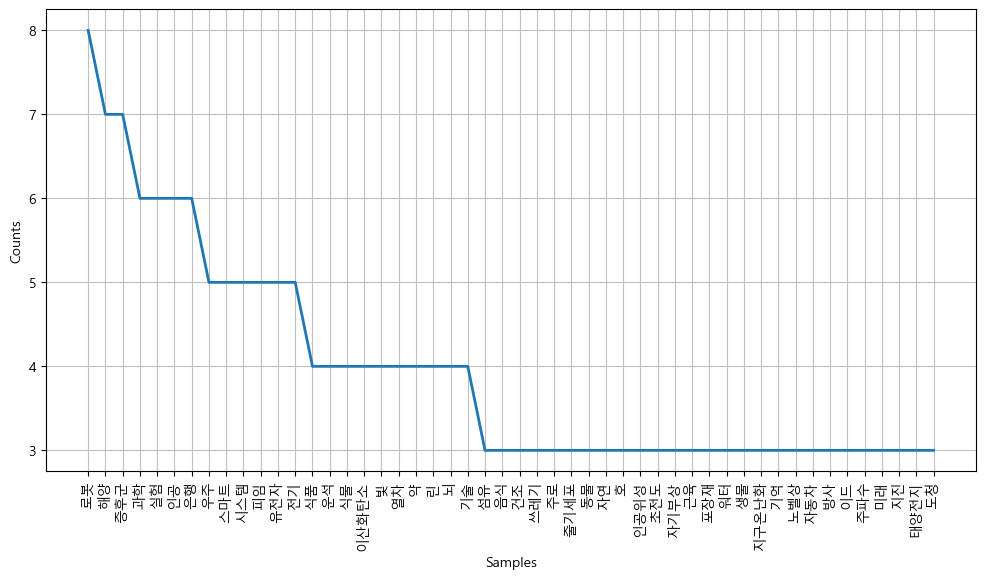

In [83]:
ko1 = nltk.Text(tokens_ko1)
plt.figure(figsize=(12,6))
ko1.plot(50)
plt.show()

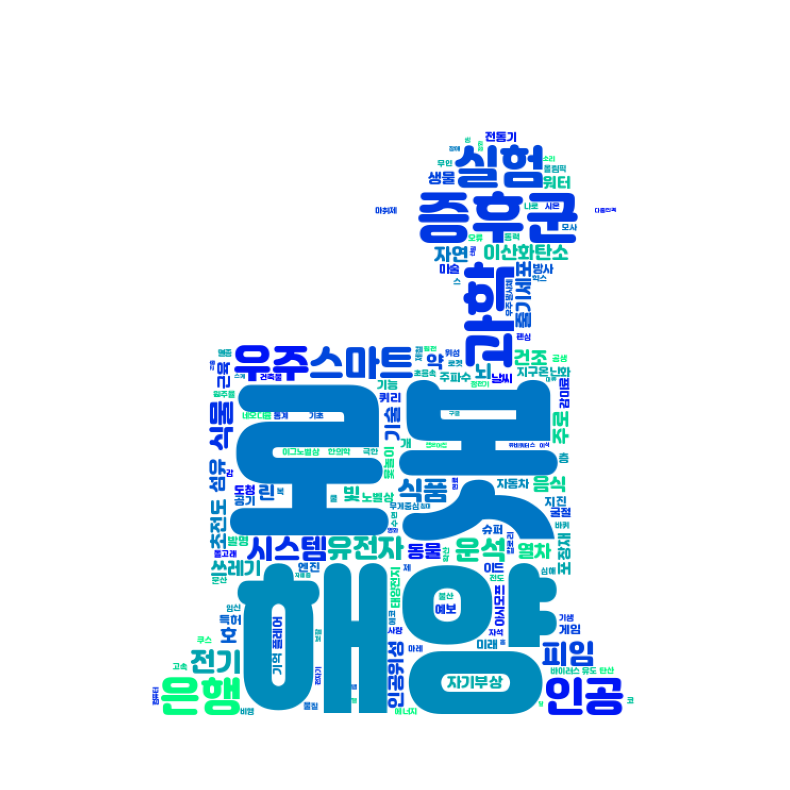

In [94]:
mask2 = np.array(Image.open('../img/444.png'))

data = ko1.vocab().most_common(150)
wordcloud = WordCloud(font_path='C:/Users/Playdata/Jalnan.ttf',
                     relative_scaling=0.1,
                     background_color='white',
                     colormap = 'winter',
                     mask = mask2
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [87]:
text2 = open('../data/e_keyw.txt').read()
text2

'horse;przewalskii;Equus\nKimjang;kimchi;fermentation\ntap;wireless internet;frequency;pen register\nLi-Fi;visible light communication;light;LED\nhibernation;adenosine;T1AM;activation\nthe sexagenary cycle;the least common multiple\nhormone;estrogen;basal metabolic rate;cortisol\nrobot;google;ubiquitous\nartificial snow;Sodium Polyacrylate;wetting agent\nAvian Influenza;infectious disease;factory farming system\nsociopath;psychopath;personality disorder\nfine dust;heavy metal;china\nskate;figure;speed;short track\nbitcoin;code;decode\ntap;a communications line;safety net;tempest\nearthquake;earthquake light;foreknowledge\nscale;spring;elasticity;plasticity\nmonday blues;new semester blues;cortisol\nMarie Curie;radium;radioactivity;Irene Joliot Curie;Curie\nbacteria;Wu Ti San;Deepwater Horizon\ninsect;foodstuff;protein\nTrojan war;wheel;pi(the ratio of the circumference)\nhacking;refrigerator;Internet of Things\nmeteorite;asteroid;meteor\npolyurethan;urethane foam;highly polymerized com

In [91]:
mask3 = np.array(Image.open('../img/444.png'))
wc1 = WordCloud(background_color='white', max_words=2000, #최대200단어
                mask=mask3, stopwords = stopwords)
wc1 = wc1.generate(text2) #엘리스라는 문서에서 단어를 뽑아옴
wc1.words_

{'water': 1.0,
 'syndrome': 0.8333333333333334,
 'air': 0.6666666666666666,
 'power': 0.6666666666666666,
 'tap': 0.5,
 'frequency': 0.5,
 'light': 0.5,
 'communication': 0.5,
 'robot': 0.5,
 'sodium': 0.5,
 'earthquake': 0.5,
 'Curie': 0.5,
 'fiber': 0.5,
 'solar': 0.5,
 'filter': 0.5,
 'network': 0.5,
 'electric': 0.5,
 'electromagnetic': 0.5,
 'magnetic': 0.5,
 'wind': 0.5,
 '3D': 0.5,
 'wave': 0.5,
 'carbon dioxide': 0.5,
 'nobel prize': 0.5,
 'wireless': 0.3333333333333333,
 'internet': 0.3333333333333333,
 'estrogen': 0.3333333333333333,
 'cortisol': 0.3333333333333333,
 'google': 0.3333333333333333,
 'system': 0.3333333333333333,
 'speed': 0.3333333333333333,
 'blues': 0.3333333333333333,
 'new': 0.3333333333333333,
 'insect': 0.3333333333333333,
 'hacking': 0.3333333333333333,
 'infinite': 0.3333333333333333,
 'gravity': 0.3333333333333333,
 'mosquito': 0.3333333333333333,
 'James': 0.3333333333333333,
 'Cook': 0.3333333333333333,
 'battery': 0.3333333333333333,
 'chip': 0.3333

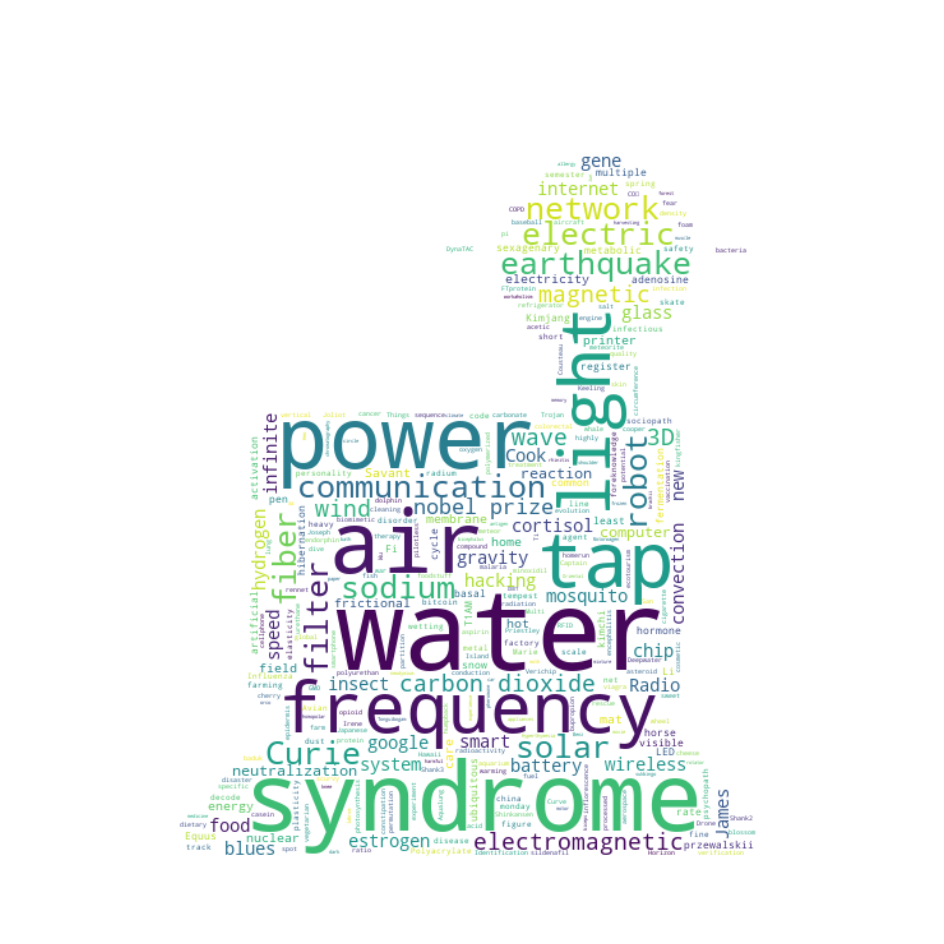

In [92]:
plt.figure(figsize=(12,12))
plt.imshow(wc1, interpolation='bilinear') # 그림이 겹쳐 보이지 않게
plt.axis('off')
plt.show()